## Lesson 3. Geographic vs Projected Coordinate Reference Systems

In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et
import seaborn as sns

In [3]:
sns.set(font_scale=1.5)
sns.set_style('white')

In [4]:
data_path = et.data.get_data('spatial-vector-lidar')

Compare coordinates for one location but saved in two different CRS's to better understand UTM

UTM Zone 13N easting: 476,911.31m, northing: 4,429,455.35m.

In [6]:
boulder_df = np.array([[476911.31, 4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

**Note:** The format of crs (below) has changed from the textbook version

In [10]:
boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs='epsg:2957')
boulder_loc

,geometry
0,POINT (476911.310 4429455.350)


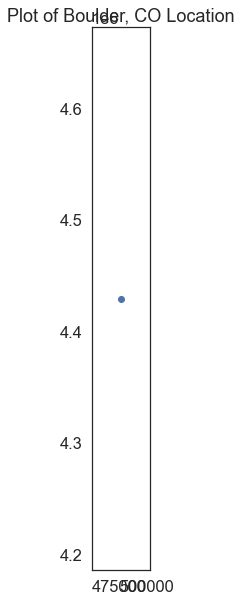

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

boulder_loc.plot(ax=ax)
ax.set_title('Plot of Boulder, CO Location')

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()

In [13]:
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - 108°W to 102°W
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
type(boulder_loc)

geopandas.geodataframe.GeoDataFrame

In [15]:
dir(boulder_loc)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__re

Project data using a different coordinate system

In [17]:
boulder_loc_geog = boulder_loc.to_crs(epsg = 4326)
boulder_loc_geog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
boulder_loc_geog

,geometry
0,POINT (-105.27055 40.01498)


Now it is possible to plot the data on top of a world map which is in a geographic CRS

In [19]:
data_path = et.data.get_data('spatial-vector-lidar')

In [20]:
worldBound = gpd.read_file(os.path.join(data_path,
                                        'global',
                                        'ne_110m_land',
                                        'ne_110m_land.shp'))
worldBound

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,Country,1,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Country,1,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Country,1,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Country,1,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


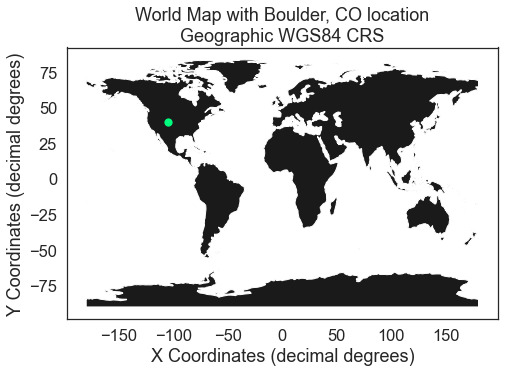

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

worldBound.plot(color='k',
                ax=ax)

ax.set(title='World Map with Boulder, CO location\nGeographic WGS84 CRS',
       xlabel='X Coordinates (decimal degrees)',
       ylabel='Y Coordinates (decimal degrees)')

boulder_loc_geog.plot(ax=ax,
                      markersize=52,
                      color='springgreen')

plt.show()